In [5]:
import os
from typing import Tuple
from pathlib import Path
import random
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import h5py
import torch
from torchvision.datasets import MNIST
from torchvision.datasets import SVHN
from torch.utils.data.dataset import TensorDataset
import torchvision.transforms as transforms
from data_fashion import FashionMNIST, FASHION_LABELS
from data_svhn import SVHN_LABELS
from data_generic import load_dataset
from utilities import iterate_dataset

from data_coloured_mnist import AugmentTensorDataset, cifar_transform, flatten, make_labels, standardize, unflatten
from data_cifar_c import load_cifar_corrupted, CIFAR10C

In [6]:
main_dir = str(Path().resolve().parent)
if not "RESULTS" in os.environ:
    os.environ["RESULTS"] = os.path.join(main_dir, "results")
    results_dir = os.environ["RESULTS"]
if not "DATASETS" in os.environ:
    os.environ["DATASETS"] = os.path.join(main_dir, "data")
    data_dir = os.environ["DATASETS"]

In [7]:
from torchvision.datasets import CIFAR10

d = CIFAR10(data_dir)
dt = CIFAR10(data_dir, train = False)

In [12]:
len(d), len(dt)

(50000, 10000)

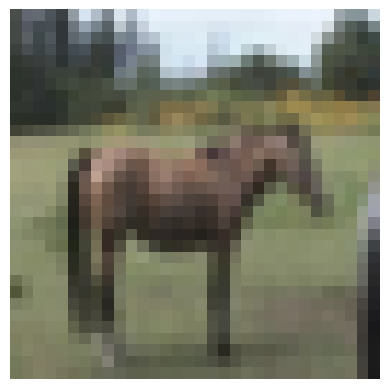

In [8]:
plt.imshow(dt[-1][0])
plt.axis('off')
plt.show()

In [13]:
data_dir = "/home/mateuszpyla/stan/sharpness/data"
corrupt = "natural"
d1 = CIFAR10C(corrupt, data_dir)
corrupt = "gaussian_noise"
d2 = CIFAR10C(corrupt, data_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/home/mateuszpyla/stan/sharpness/data/CIFAR-10-C/natural.npy'

In [11]:
len(d2)

50000

In [10]:
img0 = d1[0][0]
img1 = d1[1000][0]
img2 = d1[-1][0]
img3 = d2[0][0]
img4 = d2[-1][0]

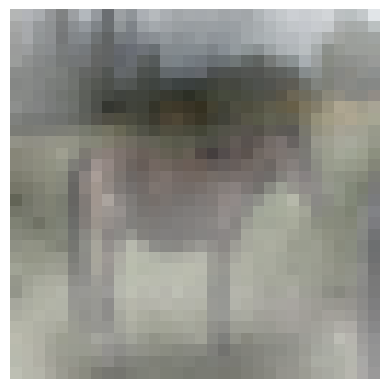

In [35]:
plt.imshow(d1[-1][0])
plt.axis('off')
plt.show()

In [4]:
train, test = load_cifar_corrupted("mse", "gaussian_noise")

NameError: name 'corruptions' is not defined

In [6]:
svhn_train = SVHN(root=data_dir, download=True, split="train")

dataset_name = "svhn"
loss = "mse"
train_dataset, test_dataset = load_dataset(dataset_name, loss)
physical_batch_size = 1000

Using downloaded and verified file: /home/mateuszpyla/stan/sharpness/data/train_32x32.mat
Using downloaded and verified file: /home/mateuszpyla/stan/sharpness/data/train_32x32.mat
Using downloaded and verified file: /home/mateuszpyla/stan/sharpness/data/extra_32x32.mat
Using downloaded and verified file: /home/mateuszpyla/stan/sharpness/data/test_32x32.mat


In [7]:
len(train_dataset)

73257

In [ ]:
svhn_train.data[0].shape

In [ ]:
svhn_train.data[0].shape

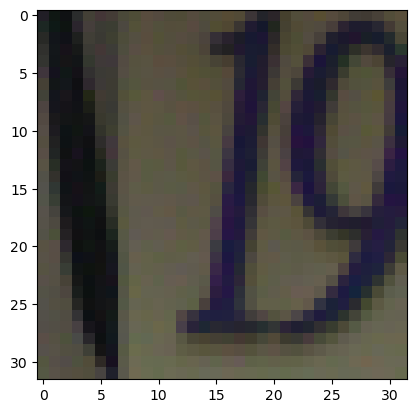

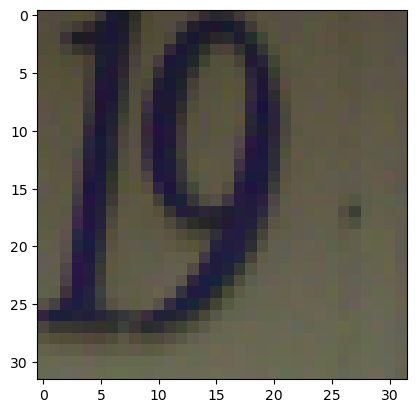

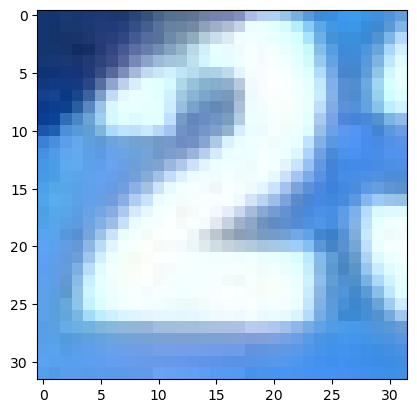

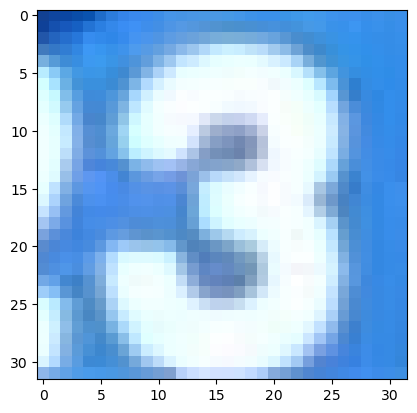

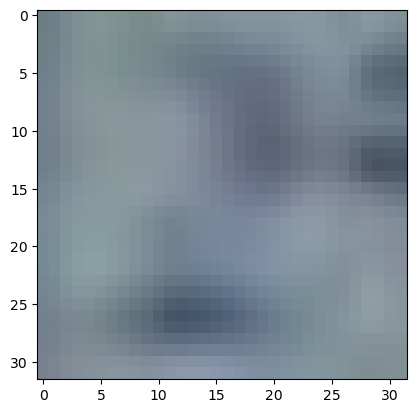

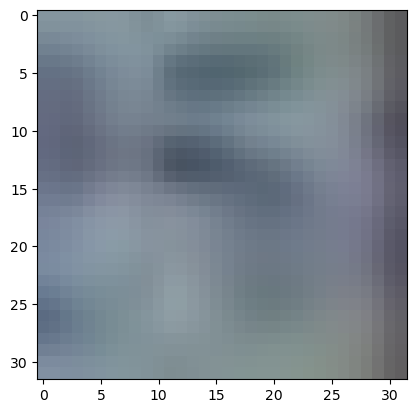

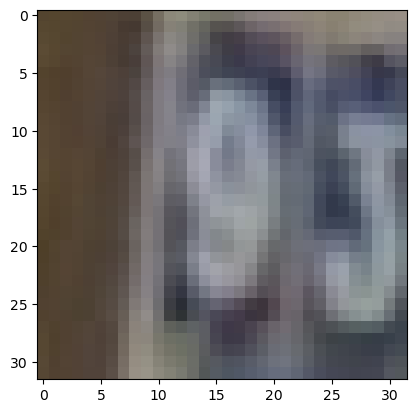

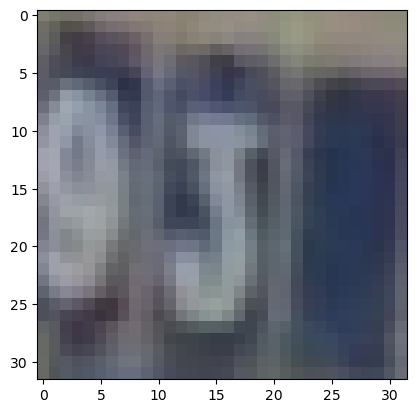

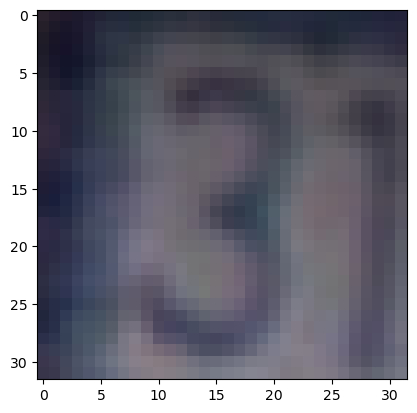

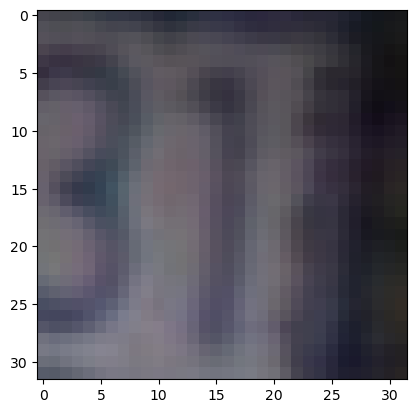

In [9]:
for i in range(10):
    plt.imshow(svhn_train.data[i].transpose((1,2,0)))
    plt.show()

torch.Size([3, 32, 32])


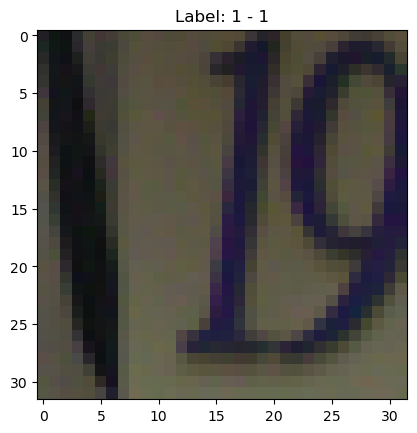

Labels batch shape: torch.Size([1000, 10])


In [8]:
physical_batch_size = 1000
for batch in iterate_dataset(train_dataset, physical_batch_size):
    (X, y) = batch
    X, y = X.cuda(), y.cuda()

    image = X[0].squeeze()
    label = y[0]
    print(image.shape)
    label_int = label.argmax().item()
    plt.title(f"Label: {label_int} - {SVHN_LABELS[label_int]}")
    plt.imshow(image.cpu().permute((1,2,0)))
    plt.show()
    print(f"Labels batch shape: {y.size()}")
    break